# SOK-1006 V25

## Forelesning 7 (med løsning) - Velferdseffekter av økonomisk politikk under fullkommen konkurranse (Kap 9)

#### 1. Forutsetninger for fullkommen konkurranse

- Det omsettes private goder i markedet uten eksterne virkninger.
- Det er et stort antall tilbydere og etterspørere, og ingen kan påvirke prisen.
- Produsenter fremstiller identiske produkter. Konsumenten er likegyldig hvem de kjøper hos.
- Aktørene i markedet er økonomisk rasjonelle (maksimering av fortjeneste og nytte).
- Full informasjon.
- Prisen er bestemt i samspill mellom tilbud og etterspørsel.
- Markedsdeltakere kan fritt gå inn eller ut av markedet.


#### 2. Likevekt under fullkommen konkurranse

Vi setter opp tilbud og etterspørsel, finner likevekten, og tegner likevekten i en figur. Dette er likevekt under fullkommen konkurranse, og dette har vi sett på før.


In [30]:
import sympy as sp
import numpy as np
from matplotlib import pyplot as plt

In [31]:
def demand(x):
    return (1500/(20+x))
def supply(x):
    return x**2/200

In [32]:
x=sp.symbols('x', real=True, positive=True)
equ=sp.Eq(demand(x),supply(x))
equ

Eq(1500/(x + 20), x**2/200)

In [33]:
x_eq=sp.solve(equ,x)
x_eq

[-20/3 + 10*(-1/2 - sqrt(3)*I/2)*(10*sqrt(2017)/3 + 4042/27)**(1/3) + 40/(9*(-1/2 - sqrt(3)*I/2)*(10*sqrt(2017)/3 + 4042/27)**(1/3)),
 -20/3 + 40/(9*(-1/2 + sqrt(3)*I/2)*(10*sqrt(2017)/3 + 4042/27)**(1/3)) + 10*(-1/2 + sqrt(3)*I/2)*(10*sqrt(2017)/3 + 4042/27)**(1/3),
 -20/3 + 40/(9*(10*sqrt(2017)/3 + 4042/27)**(1/3)) + 10*(10*sqrt(2017)/3 + 4042/27)**(1/3)]

In [34]:
# siste element er eneste som ikke er et imaginært tall
x_eq=float(x_eq[2])
x_eq

60.89684931003215

In [35]:
p_eq=demand(x_eq)
p_eq

18.542131279443815

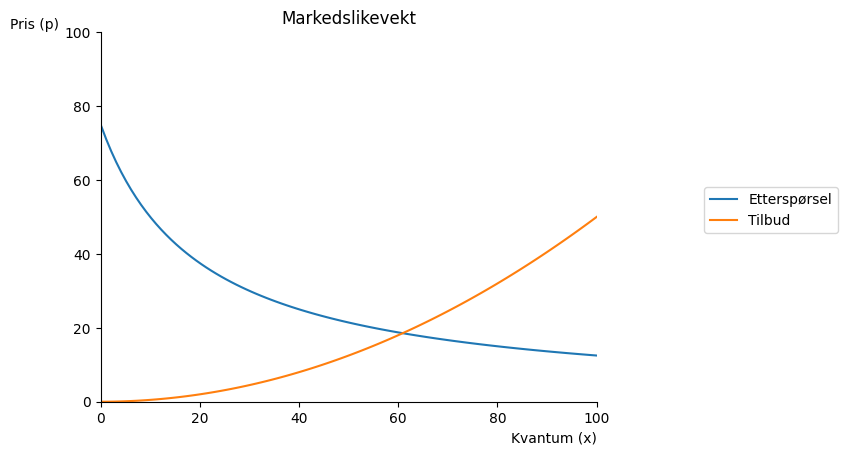

In [36]:
x_num=np.linspace(0.1,100,100)

#lag en akse

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris (p)', loc='top', rotation = 0)
                ax.set_xlabel('Kvantum (x)', loc='right')
                ax.set(xlim=(0,100))
                ax.set(ylim=(0,100))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

# plott funksjonen

ax.plot(x_num, demand(x_num), label='Etterspørsel')
ax.plot(x_num, supply(x_num), label='Tilbud')



# tittel
ax.set_title('Markedslikevekt')

#vis navnene:
ax.legend(bbox_to_anchor=(1.5,0.6));

La oss tegne inn likevektspris og -kvantum.

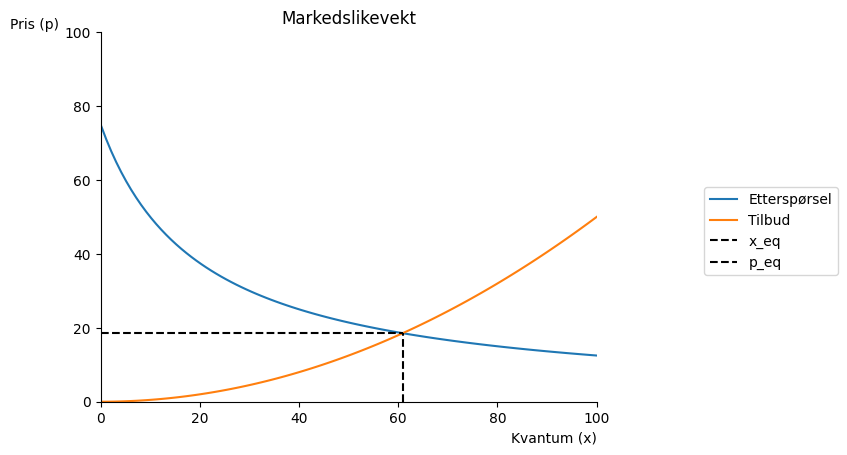

In [37]:
q = np.linspace(0,x_eq,100)

ax.vlines(x_eq,0,demand(x_eq), color='black',ls='dashed', label='x_eq')
ax.hlines(p_eq,0,x_eq, color='black',ls='dashed', label='p_eq')
ax.legend(bbox_to_anchor=(1.5,0.6))
fig

Den vertikale avstanden mellom etterspørselskurven og likevektsprisen er forskjellen i hva konsumenter er villig til å betale for hver ekstra enhet og hva de faktisk må betale. Dette er et overskudd til konsumenten, og kan summeres over alle enheter kjøpt. Dette gir oss **konsumentoverskuddet** som det grønne området nedenfor.      

Den vertikale avstanden mellom likevektsprisen og tilbudskurven viser et overskudd for produsentene ettersom tilbudskurven angir deres grensekostnad. Det røde området i figuren nedenfor angir **produsentoverskuddet**. Både KO og PO er målt i pengeenheter, og summen utgjør samfunnsøkonomisk overskudd (SO = KO+PO).

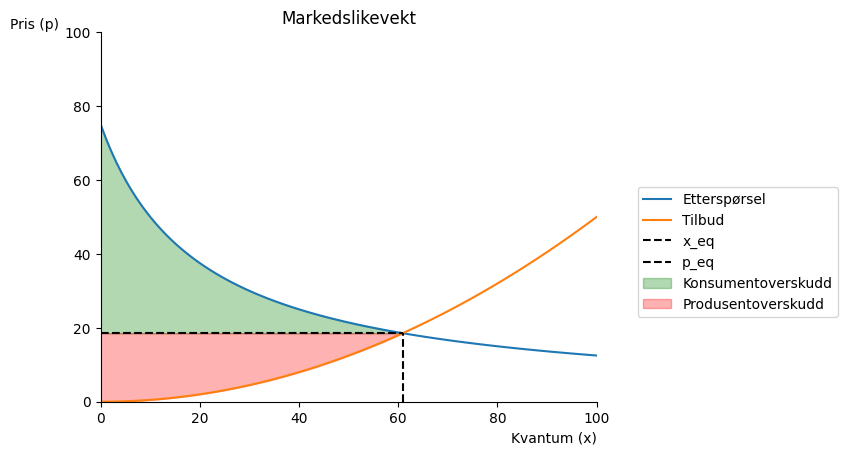

In [38]:

ax.fill_between(q,p_eq,demand(q), color = "green",alpha = 0.3,label='Konsumentoverskudd')
ax.fill_between(q,supply(q),p_eq, color = "red",alpha = 0.3,label='Produsentoverskudd')

ax.legend(bbox_to_anchor=(1.5,0.6))
fig

Markedslikevekten gir størst mulig samfunnsøkonomisk overskudd (se forelesning for bevis).

Vi kan beregne KO og PO ved hjelp av *integrasjon*.

In [39]:
producer_surplus=sp.integrate(p_eq-supply(x),(x,0,x_eq))
producer_surplus

752.771582940749

In [40]:
consumer_surplus=sp.integrate(demand(x)-p_eq,(x,0,x_eq))
consumer_surplus

967.006531985176

In [41]:
welfare_surplus=float(sp.integrate(demand(x)-supply(x),(x,0,x_eq)))
welfare_surplus

1719.7781149259245

Vi oppsummerer i en tabell:

In [42]:
from IPython.display import Markdown, display

tbl=f"""
| Overskudd           | Verdi (kr)                               |
|---------------------|  ----------------------------------------|
| Solgt mengde:       | ${np.round(float(x_eq),2)}$              |
| Pris:               | ${np.round(float(p_eq),2)}$              |
| Konsumentoverskudd: | ${np.round(float(consumer_surplus),2)}$  | 
| Produsentoverskudd: | ${np.round(float(producer_surplus),2)}$  | 
| Samføk overskudd:   | ${np.round(float(welfare_surplus),2)}$   | 
"""
display(Markdown(tbl))


| Overskudd           | Verdi (kr)                               |
|---------------------|  ----------------------------------------|
| Solgt mengde:       | $60.9$              |
| Pris:               | $18.54$              |
| Konsumentoverskudd: | $967.01$  | 
| Produsentoverskudd: | $752.77$  | 
| Samføk overskudd:   | $1719.78$   | 



### 3. Effekt av en subsidie 

Her skal vi se på virkningen av å subsidiere en vare en per enhet omsatt. Vi skal bruke samme eksempel som i forelesning 5, men nå med en subsidie. Etterspørsel er gitt ved


\begin{equation}
   x^{D}= 500 -3.2p\tag{1}
\end{equation}

og tilbud:


\begin{equation}
   x^{S}= -100 + 4.3p\tag{2}
\end{equation}

Nå skal vi anta at produsenten får en subsidie på 4 kr per enhet omsatt. 

Dersom kjøperen betaler p kr for varen får produsenten p+4 kr per enhet solgt. Da er etterspørsel det samme som i (1) og tilbud blir:   


\begin{equation}
   x^{S}= -100 + 4.3(p+4)\tag{3}
\end{equation}

La oss sette opp våre funksjoner med s som subsidie:

In [43]:
def x_d(p):
    return 500 - 3.2*p

def x_s(p, s):
    return -100+ 4.3 *(p+s)

In [44]:
# definer symboler i sympy

x,p,s=sp.symbols('x p s', positive=True, real=True)

# betingelse for likevekt

eq_cond=sp.Eq(x_d(p),x_s(p,s))
eq_cond

Eq(500 - 3.2*p, 4.3*p + 4.3*s - 100)

In [45]:
# løs for p
p_equm=sp.solve(eq_cond,p)
p_equm[0]

80.0 - 0.573333333333333*s

In [46]:
# finn tilsvarende kvantum
x_equm=x_s(p_equm[0],s)
x_equm

1.83466666666667*s + 244.0

In [47]:
# Bruk sp.lambdify for å gjøre om sympy til numpy array

# Likevektspris som funksjon av s

p_equm_fn=sp.lambdify(
    (s), 
    p_equm[0]
)

p_equm_fn(s)

80.0 - 0.573333333333333*s

In [48]:
# Likevektskvantum som funksjon av s

x_equm_fn=sp.lambdify(
    (s), 
    x_equm
)

x_equm_fn(s)

1.83466666666667*s + 244.0

In [49]:
# med s=4 og s=0
x_0=x_equm_fn(0)
x_4=x_equm_fn(4)
p_0=p_equm_fn(0)
p_4=p_equm_fn(4)

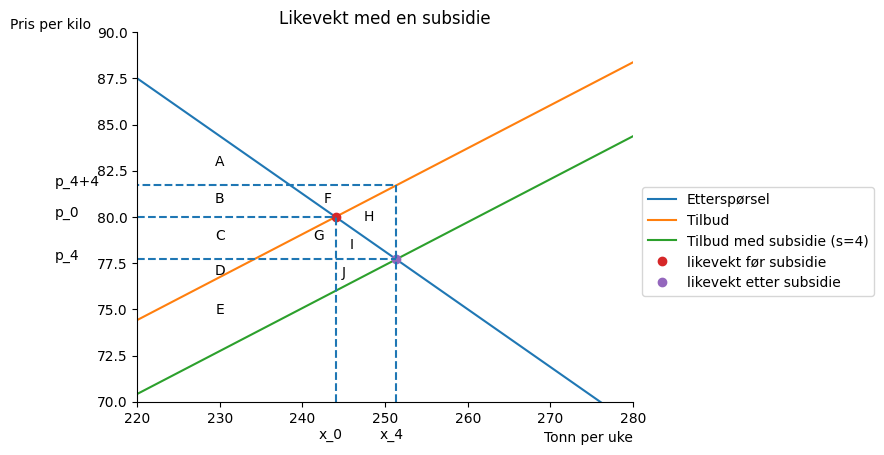

In [50]:
#vi tegner løsningen

p_num=np.linspace(0.1,300,100)

#lag en akse

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris per kilo', loc='top', rotation = 0)
                ax.set_xlabel('Tonn per uke', loc='right')
                ax.set(xlim=(220,280))
                ax.set(ylim=(70,90))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

# plott funksjonene

ax.plot(x_d(p_num),p_num, label='Etterspørsel')

ax.plot(x_s(p_num, 0),p_num, label='Tilbud')
ax.plot(x_s(p_num, 4),p_num, label='Tilbud med subsidie (s=4)')

ax.plot(x_0, p_0, 'o', label = 'likevekt før subsidie')
ax.plot(x_4, p_4, 'o', label = 'likevekt etter subsidie')

# sett inn linjer som viser likevektene


ax.vlines(x_0, 70, p_0, linestyles='dashed')
ax.hlines(p_0, 220, x_0, linestyles='dashed')


ax.vlines(x_4, 70, p_4+4, linestyles='dashed')
ax.hlines(p_4, 220,x_4, linestyles='dashed')
ax.hlines(p_4+4, 200, x_4, linestyles='dashed')

# vis pris og kvantum på aksene

ax.annotate('x_0', xy=(x_0-2,68), annotation_clip=False)
ax.annotate('x_4', xy=(x_4-2,68), annotation_clip=False)
ax.annotate('p_0', xy=(210, p_0), annotation_clip=False)
ax.annotate('p_4+4', xy=(210, p_4+4), annotation_clip=False)
ax.annotate('p_4', xy=(210, p_4), annotation_clip=False)

# sett in bokstaver for å angi områder

text = [
    (230, 83, 'A'),
    (230, 81, 'B'),
    (230, 79, 'C'),
    (230, 77.1, 'D'),
    (230, 75, 'E'),
    (243, 81, 'F'),
    (242, 79, 'G'),
    (248, 80, 'H'),
    (246, 78.5, 'I'),
    (245, 77, 'J')
]

for x, y, letter in text:
    ax.text(x, y, letter, fontsize=10, ha='center', va='center')

# tittel
ax.set_title('Likevekt med en subsidie')

#vis navnene utenfor plottet:

ax.legend(bbox_to_anchor=(1.5,0.6));

Opprinnelig likevekt er (x_0,p_0). Med en subsidie på 4 kr per enhet er ny omsetning gitt ved x_4. Konsumenter betaler p_4 og produsenter får p_4+4.        
For å beregne samfunnsøkonomisk overskudd kan vi ta summen av konsument- og produsentoverskudd:

In [51]:


tbl_før = """
| Før subsidie                  |   Verdi                          |
|-------------------------------|----------------------------------|
| Konsumentoverskudd:           | A + B                            |
| Produsentoverskudd:           | C + D                            |
| Samfunnsøkonomisk overskudd:  | A + B + C + D                    |
"""

display(Markdown(tbl_før))


| Før subsidie                  |   Verdi                          |
|-------------------------------|----------------------------------|
| Konsumentoverskudd:           | A + B                            |
| Produsentoverskudd:           | C + D                            |
| Samfunnsøkonomisk overskudd:  | A + B + C + D                    |


For å beregne samfunnsøkonomisk overskudd må vi nå ta hensyn til subsidiekostnaden. Samfunnsøkonomisk overskudd blir da KO + PO - Subsidiekostnad:

In [52]:


tbl_etter = """
| Etter subsidie          | Verdi                                  |
|-------------------------|---------------------------------------|
| Konsumentoverskudd:     | A + B + C + G + I                    | 
| Produsentoverskudd:     | C + D + B + F                        | 
| Subsidiekostnad:        | B + C + G + H + I + F                |
| Samfunnsøkonomisk overskudd: | A + B + C + D - H              | 
"""

display(Markdown(tbl_etter))



| Etter subsidie          | Verdi                                  |
|-------------------------|---------------------------------------|
| Konsumentoverskudd:     | A + B + C + G + I                    | 
| Produsentoverskudd:     | C + D + B + F                        | 
| Subsidiekostnad:        | B + C + G + H + I + F                |
| Samfunnsøkonomisk overskudd: | A + B + C + D - H              | 


Som vi ser reduseres samfunnsøkonomisk overskudd med område H sammenlignet med situasjonen før subsidien. Dette skjer fordi det produseres enheter som samfunnet verdsetter mindre enn det koster å produsere.

For velferdseffekten av en **maksimalpris**, se rapporten til Afry Menon (forelesning 6) Figur 8 side 46 samt Figur 9.16 i læreboka. For en **stykkavgift** se Afry-Menon Figur 13, side 64 og læreboka Figur 9.13.

*Oppgave*           

*Her er etterspørsel og tilbud med en stykkavgift ($t$) som er pålagt selgere av produktet ($a,b,A,B>0$):*

$$
   x^{D}= a - b p
$$


$$
   x^{S}= -A + B (p-t)
$$

*(a) Bruk SymPy til å beregne likevektspris- og kvantum som en funksjon av $t$.*       
*(b) Finn et uttrykk for konsument-, produsent-, og samfunnsøkonomisk overskudd med $t=0$.*                
*(c) Beregn KO, PO og SO for $t>0$, samt endringen fra situasjonen før avgiften ble innført.*          
*(d) Hvor mye endres KO, PO og SO pga innføring av avgiften, og hvordan avhenger dette av $a,b,A,B$?*                   
*(e) Forklar intuisjonen bak dine resultater.* 

In [ ]:

# Definerer variabler
a, b, A, B, t = sp.symbols('a b A B t', real=True, positive=True)
p = sp.Symbol('p', real=True)

# Etterspørsel og tilbud
x_D = a - b*p
x_S = -A + B*(p - t)

# (a) Finn likevektspris og kvantum
p_eq = sp.factor(sp.solve(x_D - x_S, p)[0])
x_eq = sp.factor(x_D.subs(p, p_eq))

# (b) Beregn KO, PO og SO når t = 0
p_eq_t0 = sp.factor(p_eq.subs(t, 0))
x_eq_t0 = sp.factor(x_eq.subs(t, 0))

KO_t0 = sp.factor((1/2) * x_eq_t0 * (a/b - p_eq_t0))
PO_t0 = sp.factor((1/2) * x_eq_t0 * (p_eq_t0 - (A/B)))
SO_t0 = sp.factor(KO_t0 + PO_t0)

# (c) Beregn KO, PO og SO for t > 0
KO_t = sp.factor((1/2) * x_eq * (a/b - p_eq))
PO_t = sp.factor((1/2) * x_eq * (p_eq - t - (A/B)))
Proveny_t = sp.factor(t*x_eq)
SO_t = sp.factor(KO_t + PO_t + Proveny_t)

# Endringer fra t = 0
delta_KO = sp.factor(KO_t - KO_t0)
delta_PO = sp.factor(PO_t - PO_t0)
delta_SO = sp.factor(SO_t - SO_t0)

# Viser resultatene
results = {
    "Likevektspris p*(t)": p_eq,
    "Likevektskvantum x*(t)": x_eq,
    "KO (t=0)": KO_t0,
    "PO (t=0)": PO_t0,
    "SO (t=0)": SO_t0,
    "KO (t>0)": KO_t,
    "PO (t>0)": PO_t,
    "Proveny (t>0)": Proveny_t,
    "SO (t>0)": SO_t,
    "Endring i KO": delta_KO,
    "Endring i PO": delta_PO,
    "Endring i SO": delta_SO
}

results


{'Likevektspris p*(t)': (A + B*t + a)/(B + b),
 'Likevektskvantum x*(t)': -(A*b - B*a + B*b*t)/(B + b),
 'KO (t=0)': 0.5*(-A*b + B*a)**2/(b*(B + b)**2),
 'PO (t=0)': 0.5*(-A*b + B*a)**2/(B*(B + b)**2),
 'SO (t=0)': 0.5*(-A*b + B*a)**2/(B*b*(B + b)),
 'KO (t>0)': 0.5*(A*b - B*a + B*b*t)**2/(b*(B + b)**2),
 'PO (t>0)': 0.5*(A*b - B*a + B*b*t)**2/(B*(B + b)**2),
 'Proveny (t>0)': -t*(A*b - B*a + B*b*t)/(B + b),
 'SO (t>0)': -0.5*(1.0*B + 1.0*b)*(-1.0*A*b + 1.0*B*a + 1.0*B*b*t)*(A*b - B*a + B*b*t)/(B*b*(B + b)**2),
 'Endring i KO': 0.5*B*t*(2*A*b - 2*B*a + B*b*t)/(B + b)**2,
 'Endring i PO': 0.5*b*t*(2*A*b - 2*B*a + B*b*t)/(B + b)**2,
 'Endring i SO': -0.5*B*b*t**2/(B + b)}

**Oppsummert**

$$
\text{Likevektspris } p^*(t) = \frac{A + B t + a}{B + b}
$$

$$
\text{Likevektskvantum } x^*(t) = \frac{(B a- A b - B b t)}{B + b}
$$

$$
\text{KO} (t=0) = \frac{0.5 (B a-A b )^2}{b (B + b)^2}
$$

$$
\text{PO} (t=0) = \frac{0.5 (B a-A b  )^2}{B (B + b)^2}
$$

$$
\text{SO} (t=0) = \frac{0.5 (B a-A b  )^2}{B b (B + b)}
$$

$$
\text{KO} (t>0) = \frac{0.5 (B a - A b -  B b t)^2}{b (B + b)^2}
$$

$$
\text{PO} (t>0) = \frac{0.5 (B a - A b -  B b t)^2}{B (B + b)^2}
$$

$$
\text{Proveny} (t>0) = \frac{t (B a - A b - B b t)}{B + b}
$$

$$
\text{SO} (t>0) = \frac{0.5 (B + b)(B a-A b  + B b t)(B a -A b -  B b t)}{B b (B + b)^2}
$$

$$
\text{Endring i KO} = \frac{0.5 B t (2 A b - 2 B a + B b t)}{(B + b)^2}
$$

$$
\text{Endring i PO} = \frac{0.5 b t (2 A b - 2 B a + B b t)}{(B + b)^2}
$$

$$
\text{Endring i SO} = \frac{-0.5 B b t^2}{B + b}
$$


**Restriksjoner**         

- Positivt kvantum med $t=0$ krever $Ba-Ab>0$, dvs $\frac{a}{b}>\frac{A}{B}$.       
- Positivt kvantum med $t>0$ krever $Ba-Ab-Bbt>0$, dvs $\frac{Ba-Ab}{bB}>t$.

Da kan vi utlede at "Endring i KO og PO" må være negativ ettersom dette er avhengig av fortegnet på $2Ab-2Ba+Bbt$. Dette er negativt:

$$ 0>2Ab-2Ba +Bbt \Rightarrow Ba-Ab-Bbt>Ab-Ba \Rightarrow Ba-Ab-Bbt>0>Ab-Ba
$$
som følger av ovennevnte restriksjoner på løsningen.       

Da ser vi at KO og PO faller når vi innfører en avgift. Legg merke til at den relative endringen i KO og PO er avhengig av for forholdet mellom b og B:

$$ \frac{Endring\, i\, KO}{Endring\,i\, PO}=\frac{B}{b}
$$

Konsumenter taper mest når $B>b$, noe som betyr at tilbud er mest priselastisk (målt i et felles punkt). Etterspørsel er mindre elastisk, og produsenter kan velte mer av avgiften over på konsumenter.        

Det er åpenbart at samfunnsøkonomisk overskudd reduseres når avgiften blir innført. Dødvektstapet er halvparten av avlanget som dannes fra endring i kvantum $x(0)-x(t)=\frac{Bbt}{B+b}$ ganget med avgiften $t$, dvs $-0.5t(\frac{Bbt}{B+b})$.          

Mens $a,A$ er med på å bestemme nivå på pris, kvantum osv, er det forskjeller i elastistetene mellom tilbyder og kjøper som driver de relative endringene (dvs $b,B$ er viktig for dette).

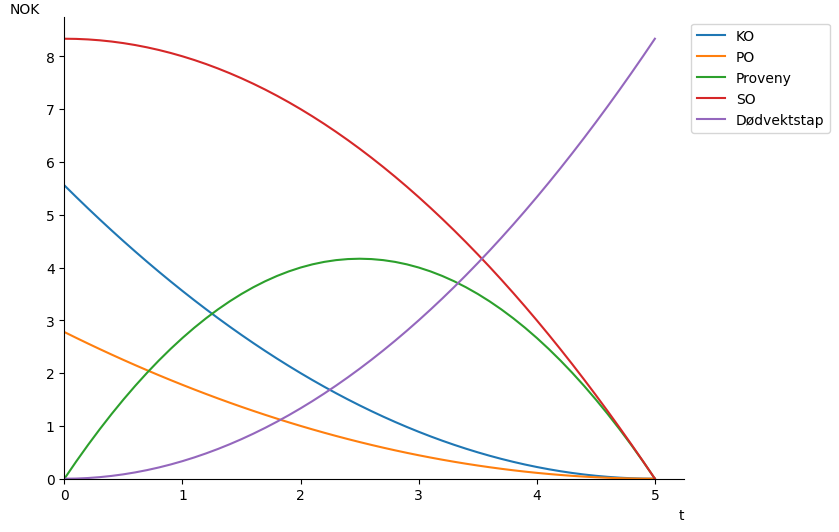

In [59]:
# La oss plotte dette for følgende verdier

a_val, A_val, b_val, B_val = 10, 10, 1, 2

# Definer uttrykkene
p_eq_t = p_eq.subs({a: a_val, A: A_val, b: b_val, B: B_val})
x_eq_t = x_eq.subs({a: a_val, A: A_val, b: b_val, B: B_val})

KO_t_expr = KO_t.subs({a: a_val, A: A_val, b: b_val, B: B_val})
PO_t_expr = PO_t.subs({a: a_val, A: A_val, b: b_val, B: B_val})
Proveny_t_expr = Proveny_t.subs({a: a_val, A: A_val, b: b_val, B: B_val})
SO_t_expr = SO_t.subs({a: a_val, A: A_val, b: b_val, B: B_val})

# dødvektstap målt i NOK
DWL_t_expr = -(SO_t.subs({a: a_val, A: A_val, b: b_val, B: B_val}) - SO_t0.subs({a: a_val, A: A_val, b: b_val, B: B_val}))




# Lag t verdier 0 til 5 (som er maks her)
t_values = sp.symbols('t_values')
t_range = [i * 0.1 for i in range(51)]  

KO_values = [KO_t_expr.subs(t, val).evalf() for val in t_range]
PO_values = [PO_t_expr.subs(t, val).evalf() for val in t_range]
Proveny_values = [Proveny_t_expr.subs(t, val).evalf() for val in t_range]
SO_values = [SO_t_expr.subs(t, val).evalf() for val in t_range]
DWL_values = [DWL_t_expr.subs(t, val).evalf() for val in t_range]

# Plott


plt.figure(figsize=(8, 6))
plt.plot(t_range, KO_values, label="KO")
plt.plot(t_range, PO_values, label="PO")
plt.plot(t_range, Proveny_values, label="Proveny")
plt.plot(t_range, SO_values, label="SO")
plt.plot(t_range, DWL_values, label="Dødvektstap")


plt.xlabel("t", loc='right')
plt.ylabel("NOK", loc='top', rotation = 0)

# ta bort øverst og høyre linje i aksen (spines)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlim(left=0)
plt.ylim(bottom=0)


plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

plt.show()


Her er etterspørsel generelt mindre priselastisk enn tilbud. Da er KO noe større enn PO gitt a=A og PO faller fortere i t.